# Data manipulation
In this second notebook, we are going to clean up and manipulate the data we exported from Canvas in the first workbook.

We will start with loading the data we exported in the first workbook, and looking at the dictionary keys associated with each discussion post type.

## Load the data

In [380]:
import pandas as pd
import json

with open('all_topics.json', 'r') as f:
    all_topics = json.load(f)

with open('all_entries.json', 'r') as f:
    all_entries = json.load(f)

with open('all_replies.json', 'r') as f:
    all_replies = json.load(f)

# Explore the data

If you haven't already, try printing some data from one of more of the discussion posts.

In [381]:
all_topics[0].keys()

dict_keys(['id', 'title', 'last_reply_at', 'created_at', 'delayed_post_at', 'posted_at', 'assignment_id', 'root_topic_id', 'position', 'podcast_has_student_posts', 'discussion_type', 'lock_at', 'allow_rating', 'only_graders_can_rate', 'sort_by_rating', 'is_section_specific', 'user_name', 'discussion_subentry_count', 'permissions', 'require_initial_post', 'user_can_see_posts', 'podcast_url', 'read_state', 'unread_count', 'subscribed', 'topic_children', 'group_topic_children', 'attachments', 'published', 'can_unpublish', 'locked', 'can_lock', 'comments_disabled', 'author', 'html_url', 'url', 'pinned', 'group_category_id', 'can_group', 'locked_for_user', 'message', 'todo_date', 'course_id'])

In [382]:
All_Keys = list(all_topics[0].keys())

In [383]:
all_entries[0].keys()

dict_keys(['id', 'user_id', 'parent_id', 'created_at', 'updated_at', 'rating_count', 'rating_sum', 'user_name', 'message', 'user', 'read_state', 'forced_read_state', 'discussion_id', 'course_id'])

In [384]:
all_replies[0].keys()

dict_keys(['id', 'user_id', 'parent_id', 'created_at', 'updated_at', 'rating_count', 'rating_sum', 'user_name', 'message', 'user', 'read_state', 'forced_read_state', 'discussion_id', 'course_id'])

In [385]:
for topic in all_topics:
    print(topic['user_name'], topic['message'])

Will Zhang <p>...</p>
Jerry Liu 
Ju Hee Park 
Bruce Zhao <p>I'm playing Sekiro.</p>
Dhruv Mahajan 
Abigail Climacosa <p>What are your top 3 food spots on/near campus?</p>
Alison Myers <p>Ketchup or mustard? You must pick one. Defend your choice! </p>
<p>If you disagree with one of your peers, respond. </p>
<p>(P.s. general - be a reasonable human applies here, be respectful, this is for fun)</p>
William Engle <p>If you're interested in learning analytics - there's a conference at UBC in June: <a href="https://solaresearch.org/events/lasi/lasi19/">https://solaresearch.org/events/lasi/lasi19/</a></p>
<p>Students get their membership for free (UBC is an institutional member) and can apply for scholarships for registration. Scholarships apply only to PhD students.</p>
Erica Commons 
Alison Myers <p><iframe src="https://www.youtube.com/embed/DK_0jXPuIr0" width="560" height="315" allowfullscreen="allowfullscreen" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture"

## Discussion content
There's more information than we really need in some of these discussion posts, so let's extact only the data elements that are of interest. I've pre-selected a few here, but or remove as you like.

In [494]:
keys_to_keep = ['user_name', 'created_at', 'message', 'discussion_id', 'id', 'parent_id', 'discussion_type']


In [495]:
reduced_topics = []
for topic in all_topics:
    reduced_topics.append({k: topic.get(k, None) for k in keys_to_keep})
print(reduced_topics)

[{'user_name': 'Will Zhang', 'created_at': '2019-03-30T18:58:43Z', 'message': '<p>...</p>', 'discussion_id': None, 'id': 265853, 'parent_id': None, 'discussion_type': 'side_comment'}, {'user_name': 'Jerry Liu', 'created_at': '2019-03-30T18:02:49Z', 'message': '', 'discussion_id': None, 'id': 265842, 'parent_id': None, 'discussion_type': 'side_comment'}, {'user_name': 'Ju Hee Park', 'created_at': '2019-03-30T18:01:08Z', 'message': '', 'discussion_id': None, 'id': 265840, 'parent_id': None, 'discussion_type': 'side_comment'}, {'user_name': 'Bruce Zhao', 'created_at': '2019-03-30T17:15:36Z', 'message': "<p>I'm playing Sekiro.</p>", 'discussion_id': None, 'id': 265828, 'parent_id': None, 'discussion_type': 'side_comment'}, {'user_name': 'Dhruv Mahajan', 'created_at': '2019-03-30T17:07:28Z', 'message': '', 'discussion_id': None, 'id': 265827, 'parent_id': None, 'discussion_type': 'side_comment'}, {'user_name': 'Abigail Climacosa', 'created_at': '2019-03-30T17:07:12Z', 'message': '<p>What ar

In [496]:
reduced_entries = []
for entry in all_entries:
    reduced_entries.append({k: entry.get(k, None) for k in keys_to_keep})

In [497]:
reduced_replies = []
for topic in all_replies:
    reduced_replies.append({k: topic.get(k, None) for k in keys_to_keep})
print(reduced_replies)

[{'user_name': 'Jerry Liu', 'created_at': '2019-03-30T18:27:49Z', 'message': '<p>testing reply</p>', 'discussion_id': 265842, 'id': 784631, 'parent_id': 784624, 'discussion_type': None}, {'user_name': 'Tianzong Chen', 'created_at': '2019-03-30T18:36:57Z', 'message': '<p>Same</p>', 'discussion_id': 265840, 'id': 784650, 'parent_id': 784633, 'discussion_type': None}, {'user_name': 'Shuai Wang', 'created_at': '2019-03-30T17:16:07Z', 'message': '<p>would this reply make a difference ?\xa0</p>', 'discussion_id': 265827, 'id': 784496, 'parent_id': 784494, 'discussion_type': None}, {'user_name': 'Eduardo Muntaner Garcia', 'created_at': '2019-03-30T18:34:27Z', 'message': '<p>U r dum</p>', 'discussion_id': 265808, 'id': 784644, 'parent_id': 784429, 'discussion_type': None}, {'user_name': 'William Engle', 'created_at': '2019-03-30T16:26:21Z', 'message': '<p>I sometimes put mustard on fries (it can be good)!</p>', 'discussion_id': 265808, 'id': 784432, 'parent_id': 784395, 'discussion_type': None

## Merging data

now that we've extacted common keys from the three discussion post types, we can group them together into one data structure

In [498]:
all_posts = reduced_topics+reduced_entries+reduced_replies

## Pandas

docs: http://pandas.pydata.org/pandas-docs/stable/

We are going to create a dataframe from the list-of-dictionaries data that we have.

A dataframe is a table-like data structure that allows for powerful row-wise or column-wise slicing, dicing, or aggregating

In [499]:
df = pd.DataFrame(all_posts)
df.to_csv('all_posts.csv', header=True, index=False)

In [500]:
# select only the rows of the dataframe from a particular discussion
df[df['discussion_id']==259704]

,created_at,discussion_id,discussion_type,id,message,parent_id,user_name
56,2019-03-30T18:27:20Z,259704.0,None,784630,<p>Both</p>,NaN,Daniel Liu
57,2019-03-30T18:25:20Z,259704.0,None,784622,<p>Yanny </p>,NaN,Tianzong Chen
58,2019-03-30T17:44:25Z,259704.0,None,784551,<p>I heard Laurel!</p>,NaN,Luanna Lin
59,2019-03-30T16:12:01Z,259704.0,None,784415,<p>Yanny</p>,NaN,Michelle Gu
60,2019-03-30T16:10:48Z,259704.0,None,784411,<p>Laurel.</p>,NaN,Munkhtur Myagmar
61,2019-03-30T16:07:57Z,259704.0,None,784402,<p>Laurel</p>,NaN,Patricia Varao Sousa
62,2019-03-30T16:07:46Z,259704.0,None,784401,Yanny,NaN,Winnie LI
63,2019-03-30T16:01:07Z,259704.0,None,784392,<p>Laurel!</p>,NaN,Brooke Dai
64,2019-03-30T15:59:33Z,259704.0,None,784388,<p>Yanny </p>,NaN,Cindy Cen
65,2019-03-30T15:59:01Z,259704.0,None,784387,<p>Laurel</p>,NaN,Harrison Lee


In [501]:
# select only one column from the dataframe
df['user_name']

0                   Will Zhang
1                    Jerry Liu
2                  Ju Hee Park
3                   Bruce Zhao
4                Dhruv Mahajan
5            Abigail Climacosa
6                 Alison Myers
7                William Engle
8                Erica Commons
9                 Alison Myers
10                Alison Myers
11                Alison Myers
12                        None
13                        None
14                        None
15                        None
16                        None
17                  Will Zhang
18                   Jerry Liu
19               Alexandra Gil
20                  Daniel Liu
21                   Jerry Liu
22           Abigail Climacosa
23                 Nakul Gupta
24              Dong-Tao Zhang
25                  Shuai Wang
26                  Bruce Zhao
27        Patricia Varao Sousa
28           Abigail Climacosa
29                Gagan Bhatia
                ...           
96        Patricia Varao Sousa
97      

In [502]:
# combining the above, we can get a listing of just the user names from a particular discussion
df[df['discussion_id']==259704]['user_name']

56                  Daniel Liu
57               Tianzong Chen
58                  Luanna Lin
59                 Michelle Gu
60            Munkhtur Myagmar
61        Patricia Varao Sousa
62                   Winnie LI
63                  Brooke Dai
64                   Cindy Cen
65                Harrison Lee
66              Surohit Tandon
67            Farbod Chamanian
68              Michael Oliver
69                  James Shen
70                 Ao Lin Gong
71                 Ju Hee Park
72                 Kofi Buahin
73     Eduardo Muntaner Garcia
111               Towela Tembo
112               Towela Tembo
Name: user_name, dtype: object

### Aggregating in Pandas
Here we are going to print the total number of discussion topics/entries/replies for each user.

In [503]:
posts_per_user = df['user_name'].value_counts().reset_index()
posts_per_user.columns = ['user_name', 'count']
posts_per_user.to_csv('posts_per_user.csv', header=True, index=False)
print(posts_per_user)

                  user_name  count
0              Alison Myers     10
1             William Engle      6
2      Patricia Varao Sousa      5
3                Shuai Wang      5
4               Nakul Gupta      4
5                 Jerry Liu      4
6         Abigail Climacosa      4
7                 Winnie LI      4
8   Eduardo Muntaner Garcia      4
9            Kristo Krugger      3
10               Bruce Zhao      3
11             Estella Wang      3
12            Alexandra Gil      3
13              Michelle Gu      3
14           Surohit Tandon      3
15            Tianzong Chen      3
16              Ao Lin Gong      3
17               Daniel Liu      3
18               James Shen      3
19             Towela Tembo      3
20         Munkhtur Myagmar      3
21              Ju Hee Park      3
22              Kofi Buahin      3
23               Luanna Lin      2
24                Cindy Cen      2
25            Aaron Ngu Ngu      2
26         Farbod Chamanian      2
27               Bro

## What next?

Try doing some more data exploration and manipulation!

Here are some ideas:

* Use pandas to find all your discussion posts
* Use pandas to count the number of entries/replies in each discussion topic
* Count the number of posts by day
* Extract the message contents and count certain words

In [504]:
df[df.user_name == "Surohit Tandon"]

,created_at,discussion_id,discussion_type,id,message,parent_id,user_name
52,2019-03-30T16:09:02Z,265697.0,None,784404,<p>The stair case entrance upstairs is locked ...,NaN,Surohit Tandon
66,2019-03-30T15:04:34Z,259704.0,None,784356,<p>Yanny!</p>,NaN,Surohit Tandon
97,2019-03-30T15:08:21Z,259571.0,None,784357,"<p>Hey all, my name is Surohit Tandon.I am exc...",NaN,Surohit Tandon


In [553]:
All_Keys = [ 'title','posted_at', 'author'
            ,'user_name', 'created_at', 'message', 'discussion_id','user_id']

In [554]:
reduced_topics2 = []
for topic in all_topics:
    reduced_topics2.append({k: topic.get(k, None) for k in All_Keys})


In [555]:
reduced_entries2 = []
for entry in all_entries:
    reduced_entries2.append({k: entry.get(k, None) for k in All_Keys})

In [556]:
reduced_replies2 = []
for topic in all_replies:
    reduced_replies2.append({k: topic.get(k, None) for k in All_Keys})


In [557]:
all_posts2 = reduced_topics2+reduced_entries2+reduced_replies2

In [558]:
df2 = pd.DataFrame(all_posts2)
df2.to_csv('all_posts2.csv', header=True, index=False)

In [559]:
numbs = df2.shape[0]

In [570]:
df2.discussion_id.value_counts(dropna=False)

 259702.0    23
 259704.0    20
 259571.0    19
NaN          17
 265808.0    15
 265827.0     9
 265826.0     6
 265840.0     4
 265697.0     4
 259726.0     3
 265842.0     2
 265828.0     2
 265853.0     1
 265804.0     1
Name: discussion_id, dtype: int64

In [571]:
author_ids = []
for n in range(numbs):
    ids = df2.author[n]
    author_ids.append(ids)
    del author_ids[9:]
author_ids

[{'id': 14655,
  'display_name': 'Will Zhang',
  'avatar_image_url': 'https://canvas.ubc.ca/images/messages/avatar-50.png',
  'html_url': 'https://canvas.ubc.ca/courses/30739/users/14655'},
 {'id': 42040,
  'display_name': 'Jerry Liu',
  'avatar_image_url': 'https://canvas.ubc.ca/images/messages/avatar-50.png',
  'html_url': 'https://canvas.ubc.ca/courses/30739/users/42040'},
 {'id': 12463,
  'display_name': 'Ju Hee Park',
  'avatar_image_url': 'https://canvas.ubc.ca/images/messages/avatar-50.png',
  'html_url': 'https://canvas.ubc.ca/courses/30739/users/12463'},
 {'id': 215503,
  'display_name': 'Bruce Zhao',
  'avatar_image_url': 'https://canvas.ubc.ca/images/messages/avatar-50.png',
  'html_url': 'https://canvas.ubc.ca/courses/30739/users/215503'},
 {'id': 46719,
  'display_name': 'Dhruv Mahajan',
  'avatar_image_url': 'https://canvas.ubc.ca/images/messages/avatar-50.png',
  'html_url': 'https://canvas.ubc.ca/courses/30739/users/46719'},
 {'id': 15854,
  'display_name': 'Abigail Cli

In [572]:
author_ids_nums = []
for i in range(9):
    author_ids_nums.append(author_ids[i]['id'])
author_ids_nums

[14655, 42040, 12463, 215503, 46719, 15854, 185698, 9814, 118474]

In [576]:
print(df2.user_id.value_counts(dropna=False).head())
print(df2.discussion_id.value_counts(dropna=False).head())

NaN          17
 185698.0     6
 218007.0     5
 60563.0      5
 9814.0       5
Name: user_id, dtype: int64
 259702.0    23
 259704.0    20
 259571.0    19
NaN          17
 265808.0    15
Name: discussion_id, dtype: int64


In [585]:
df_messages = df2.iloc[17:,:].copy()

In [688]:
messages = df_messages.message.copy()

In [690]:
messages.head(10)

17                                         <p>1</p>
18                             <p>testing entry</p>
19                             <p>Nitobe garden</p>
20                                   <p>My dorm</p>
21                                   <p>testing</p>
22                     <p>cyan:wave1: Runescape</p>
23                 <p>Shadow of war! </p>\n<p> </p>
24                              <p>I don't know</p>
25    <p>Love it. I love Pizzahut. Domino Pizza</p>
26                     <p>Love potato on pizza.</p>
Name: message, dtype: object

In [594]:
for i in range(17,df_messages.shape[0]):
    messages[i] = messages[i][3:-4]
    messages[i] = re.sub(r"[^a-zA-Z0-9]"," ",messages[i])
messages


17                                                     1
18                                         testing entry
19                                         Nitobe garden
20                                               My dorm
21                                               testing
22                                 cyan wave1  Runescape
23                              Shadow of war    p   p  
24                                          I don t know
25                Love it  I love Pizzahut  Domino Pizza
26                                 Love potato on pizza 
27                          Maybe fries but not potatoes
28                                                      
29                                  Pineapple on pizza  
30                           Thoughts on fries on pizza 
31                                       I dont like it 
32                                       Great Dane cafe
33                                         Uncle Fatih s
34            Blue chips cookie

In [595]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
def tokenize(text):
    # Converting all text to lower case
    text = text.lower()
    
    # Removing punctuation from all text
    text = re.sub(r"[^a-zA-Z0-9]"," ",text)
    words = word_tokenize(text)
    
    # Removing stop words
    new_words = []
    for w in words:
        if w not in stopwords.words('english'):
            new_words.append(w)
    
    # Lemmatizing our new words
    lemmatizer = WordNetLemmatizer()
    
    clean_tokens = []
    for word in new_words:
        clean_tok = lemmatizer.lemmatize(word).strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [597]:
# Visualising 
print(vectorizer.get_feature_names())
print(X.toarray())

['03', '1', '2', '20', '2019', '20stories', '2624', '30739', '375', '3966206353', '41894164051', '500', '5th', '60563', '89a2c7dd0b', 'access', 'acknowledgement', 'action', 'alison', 'along', 'also', 'alt', 'amp', 'analyst', 'analytic', 'another', 'application', 'april', 'aria', 'attend', 'author', 'bag', 'banana', 'beginning', 'bind', 'bl', 'black', 'blue', 'bringing', 'business', 'buy', 'bypass', 'ca', 'cafe', 'call', 'canvas', 'card', 'case', 'centre', 'chip', 'choice', 'choose', 'chose', 'chup', 'class', 'classic', 'clear', 'click', 'co', 'cog', 'cognitive', 'com', 'company', 'condiment', 'content', 'context', 'cookie', 'course', 'court', 'cute', 'cuz', 'cyan', 'dane', 'data', 'deadline', 'debate', 'definitely', 'design', 'difference', 'disabled', 'discussion', 'display', 'div', 'dog', 'domino', 'dont', 'dorm', 'dqw4w9wgxcq', 'drag', 'dress', 'dum', 'e', 'easy', 'education', 'elevator', 'em', 'employment', 'endless', 'enhanced', 'enthusiast', 'entrance', 'entry', 'european', 'even'

In [598]:
df_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()) 

In [602]:
df_words.columns[:15]

Index(['03', '1', '2', '20', '2019', '20stories', '2624', '30739', '375',
       '3966206353', '41894164051', '500', '5th', '60563', '89a2c7dd0b'],
      dtype='object')

In [604]:
cols_to_drop = df_words.columns[:15]

In [605]:
# Lol deleted the orignal code by accident 
cols_to_drop 

Index(['03', '1', '2', '20', '2019', '20stories', '2624', '30739', '375',
       '3966206353', '41894164051', '500', '5th', '60563', '89a2c7dd0b'],
      dtype='object')

In [610]:
cols = list(cols_to_drop)+['p','http','href']

In [611]:
df_words = df_words.drop(cols, axis = 1)

In [617]:
df_words.head()

,access,acknowledgement,action,alison,along,also,alt,amp,analyst,analytic,...,winnie,work,workshop,would,wrapper,wrong,www,yanny,year,youtu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [664]:
from sklearn.feature_extraction.text import TfidfTransformer
tv = TfidfTransformer()
tv.fit_transform(df_words)

<109x319 sparse matrix of type '<class 'numpy.float64'>'
	with 495 stored elements in Compressed Sparse Row format>

In [616]:
df_messages.head()

,author,created_at,discussion_id,message,posted_at,title,user_id,user_name
17,None,2019-03-30T18:59:34Z,265853.0,<p>1</p>,None,None,14655.0,Will Zhang
18,None,2019-03-30T18:26:30Z,265842.0,<p>testing entry</p>,None,None,42040.0,Jerry Liu
19,None,2019-03-30T18:36:05Z,265840.0,<p>Nitobe garden</p>,None,None,24988.0,Alexandra Gil
20,None,2019-03-30T18:28:43Z,265840.0,<p>My dorm</p>,None,None,117279.0,Daniel Liu
21,None,2019-03-30T18:02:13Z,265840.0,<p>testing</p>,None,None,42040.0,Jerry Liu


In [625]:
df_messages.discussion_id.isna().sum()

0

In [670]:
new_df = df_messages.reset_index().copy()
df_target_variable = new_df.discussion_id

In [671]:
from sklearn.model_selection import train_test_split
X=df_words
Y=df_target_variable
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [672]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [673]:
y_pred = clf.predict(X_test)

In [674]:
accuracy = (y_pred == y_test).mean()

In [684]:
print("Accruacy: {0:0.1f}%".format(accuracy*100))

Accruacy: 57.1%


In [647]:
most_words = df_words.sum().sort_values().tail(n=20)
most_words_headers = most_words.index

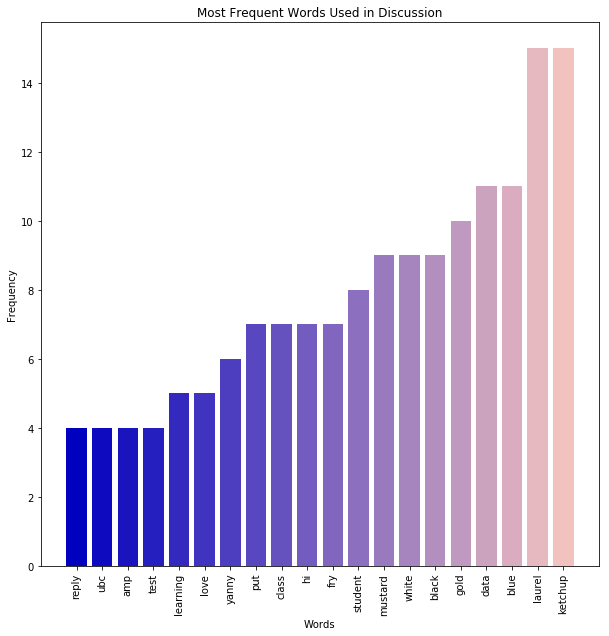

In [686]:
%matplotlib inline
import matplotlib.pyplot as plt
my_colors = [(x/20.0, x/25.0, 0.75) for x in range(len(most_words))]
plt.figure(figsize=(10,10))
plt.bar(x = most_words_headers, height = most_words, color = my_colors)
plt.xticks(rotation=90)
plt.title("Most Frequent Words Used in Discussion")
plt.xlabel("Words")
plt.ylabel("Frequency");